In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Script for loading all data

data_path = "fullFreqData"

filenames = [filename for filename in sorted(os.listdir(data_path))] 
FPGAs = {}

for filename in filenames:
    if filename.endswith(".csv"):
        file_path = os.path.join(data_path,filename)
        raw_data = pd.read_csv(file_path, sep=',', header=None)
        FPGAs[filename] = raw_data
        #filenames.append(filename)
    
#print(len(FPGAs),FPGAs[filenames[0]].shape)

In [3]:
avg_ROfreq = {}

for key,value in FPGAs.items():
    avg_ROfreq[key] = np.mean(value, axis=1)
    
print(avg_ROfreq[filenames[0]].shape)

avg_ROfreq_list = []

for _,value in avg_ROfreq.items():
    avg_ROfreq_list.append(value)

mean_ROfreq_across_FPGAs = np.mean(np.asarray(avg_ROfreq_list), axis=0)
#mean_ROfreq_across_FPGAs.shape

(512,)


In [4]:
mean_ROfreq_mapping = mean_ROfreq_across_FPGAs.reshape(32,16)
#mean_ROfreq_mapping.shape

Problem B: Figure 1


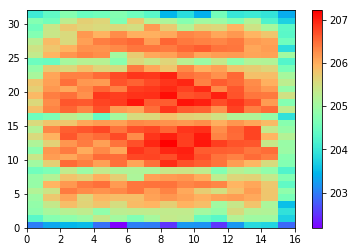

In [5]:
print("Problem B: Figure 1")
fig1 = plt.figure(1)
plt.pcolor(mean_ROfreq_mapping, cmap=cm.rainbow)
plt.colorbar(orientation='vertical')
plt.show()

Problem B: Figure 2


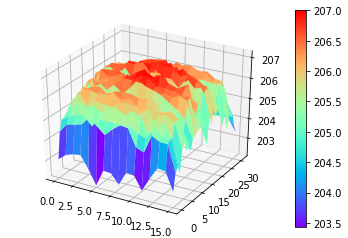

In [6]:
X = np.arange(0, 16)
Y = np.arange(0, 32)
X, Y = np.meshgrid(X, Y)

print("Problem B: Figure 2")
fig2 = plt.figure(2)
ROfreq_plot_3d = fig2.gca(projection='3d')
surf = ROfreq_plot_3d.plot_surface(X, Y, mean_ROfreq_mapping, cmap=cm.rainbow)
fig2.colorbar(surf)
plt.show()

In [7]:
# helper functions

def bin_to_dec(binary):
    dec = 0
    for i in range(len(binary)):
        dec += binary[i]*2**(len(binary)-1-i)
    return dec

def PUF_response(hex_dict,bin_dict,RO_freqs,skip=1):
    if isinstance(RO_freqs,dict):
        for key,value in RO_freqs.items():
            PUF_resp = [1 if value[i+j]>value[(i+j+skip)%512] else 0 for j in range(skip) for i in range(0,512,skip*2)]
            bin_dict[key] = PUF_resp
            hex_dict[key] = hex(bin_to_dec(PUF_resp))
    else:
        for value in RO_freqs:
            PUF_resp = [1 if value[i+j]>value[(i+j+skip)%512] else 0 for j in range(skip) for i in range(0,512,skip*2)]
            bin_dict.append(PUF_resp)
            hex_dict.append(hex(bin_to_dec(PUF_resp)))


In [8]:
#PUF_response

In [9]:
# Compute PUF response

PUF_response_hex = {}
PUF_response_bin = {}    
PUF_response(PUF_response_hex, PUF_response_bin, avg_ROfreq)

PUF_response_avg = []

for value in PUF_response_bin.values():
    PUF_response_avg.append(value)

PUF_response_avg = np.mean(np.asarray(PUF_response_avg), axis=0)
PUF_response_avg = PUF_response_avg.reshape(32,8)
print("Problem C: The 256-bit PUF response is ", PUF_response_avg)

Problem C: The 256-bit PUF response is  [[0.40414508 0.47150259 0.70984456 0.51813472 0.32124352 0.70984456
  0.34196891 0.71502591]
 [0.35233161 0.48186528 0.59585492 0.41968912 0.50777202 0.5492228
  0.52849741 0.80829016]
 [0.41968912 0.47668394 0.39378238 0.53367876 0.49740933 0.58549223
  0.62176166 0.75647668]
 [0.38341969 0.57512953 0.60103627 0.46632124 0.43005181 0.68393782
  0.37305699 0.81865285]
 [0.30051813 0.65284974 0.50777202 0.43005181 0.51813472 0.44041451
  0.59585492 0.81865285]
 [0.42487047 0.52331606 0.49222798 0.58031088 0.59067358 0.56476684
  0.44041451 0.75129534]
 [0.24870466 0.43005181 0.59585492 0.49222798 0.50259067 0.52331606
  0.44041451 0.84455959]
 [0.38860104 0.53367876 0.60621762 0.23316062 0.47668394 0.66321244
  0.48186528 0.70984456]
 [0.47668394 0.56476684 0.55440415 0.50777202 0.49740933 0.66839378
  0.55440415 0.67875648]
 [0.31606218 0.5492228  0.37305699 0.41450777 0.56476684 0.54404145
  0.52849741 0.67875648]
 [0.29015544 0.43005181 0.50259

In [10]:
#PUF_response_avg.shape

Problem D: Figure 3


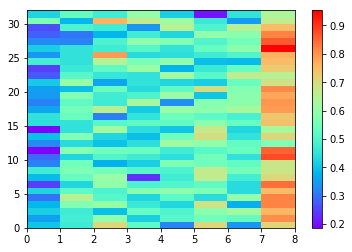

In [11]:
print("Problem D: Figure 3")
fig3 = plt.figure(3)
plt.pcolor(PUF_response_avg, cmap=cm.rainbow)
plt.colorbar(orientation='vertical')
plt.show()

In [12]:
# Compute the Hamming Distance

def hd(value1, value2):
    hd_cnt = 0
    xor_res = int(value1,base=16) ^ int(value2,base=16)
    for i in range(256):
        xor_res = xor_res >> 1
        if xor_res % 2 == 1:
            hd_cnt += 1
    return hd_cnt


hamming_distance = []
used_key = []

for key1,value1 in PUF_response_hex.items():
    used_key.append(key1)
    for key2,value2 in PUF_response_hex.items():
        if key2 not in used_key:
            hamming_distance.append(hd(value1,value2))

#len(hamming_distance)

Problem E: Figure 4 inter-HD histogram


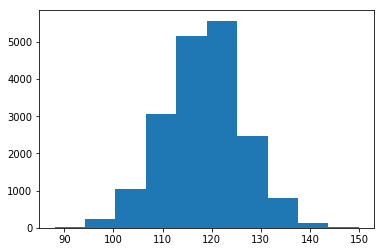

Problem E: Mean of the Hamming Distance is:  118.26554404145078
           Standard deviation of the Hamming Distance is:  8.070820499154978


In [13]:
hamming_distance = np.asarray(hamming_distance)
print("Problem E: Figure 4 inter-HD histogram")
fig4 = plt.figure(4)
plt.hist(hamming_distance)
plt.show()

hamming_distance_mean = np.mean(hamming_distance) 
hamming_distance_std = np.std(hamming_distance)
print("Problem E: Mean of the Hamming Distance is: ", hamming_distance_mean)
print("           Standard deviation of the Hamming Distance is: ", hamming_distance_std)

In [14]:
# Compute PUF response for 100 measurements in all FPGAs

PUF_response_all_FPGA_hex = [[] for i in range(193)]
PUF_response_all_FPGA_bin = [[] for i in range(193)]    

i = 0
for key,value in FPGAs.items():
    value_list = list(np.asarray(value).T)
    PUF_response(PUF_response_all_FPGA_hex[i], PUF_response_all_FPGA_bin[i], value_list)
    i += 1   

In [15]:
#PUF_response_all_FPGA_hex[0][1]

In [28]:
# Calculate average intra-HD

used_resp = []
intra_hd = []
fpga_idx = 0
animation = ['.  ','.. ','...']
for responses in PUF_response_all_FPGA_hex:
    print("calculating intra-HD for FPGA[{0}/193] {1}".format(fpga_idx+1, animation[fpga_idx%3]), end='\r')
    fpga_idx += 1
    for resp1 in responses:
        used_resp.append(resp1)
        for resp2 in responses:
            if resp2 not in used_resp: 
                intra_hd.append(hd(resp1, resp2))

KeyboardInterrupt: 

Problem F: Figure 5 intra-HD histogram


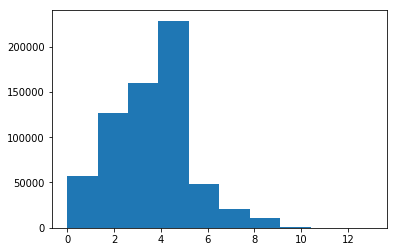

Problem F: Mean of the intra Hamming Distance is:  3.572615148812756
           Standard deviation of the intra Hamming Distance is:  1.6523068854282774


In [17]:
intra_hd = np.asarray(intra_hd)
print("Problem F: Figure 5 intra-HD histogram")
fig5 = plt.figure(5)
plt.hist(intra_hd)
plt.show()

intra_hd_mean = np.mean(intra_hd) 
intra_hd_std = np.std(intra_hd)
print("Problem F: Mean of the intra Hamming Distance is: ", intra_hd_mean)
print("           Standard deviation of the intra Hamming Distance is: ", intra_hd_std)

In [18]:
# Compute PUF response by forming a non-overlapping set of RO pairs using
# the following methodology RO1 with RO17, RO2 with RO18, etc.

PUF_response_hex_skip16 = {}
PUF_response_bin_skip16 = {}
PUF_response(PUF_response_hex_skip16, PUF_response_bin_skip16, avg_ROfreq, skip=16)

In [19]:
# plot the new average PUF response

PUF_response_all_FPGA_bin_skip16 = []

for value in PUF_response_bin_skip16.values():
    PUF_response_all_FPGA_bin_skip16.append(value)
    
PUF_response_all_FPGA_bin_skip16 = np.asarray(PUF_response_all_FPGA_bin_skip16)
PUF_response_avg_skip16 = np.mean(PUF_response_all_FPGA_bin_skip16, axis=0).reshape(32,8)

In [20]:
#PUF_response_avg_skip16

Problem H: Figure 6


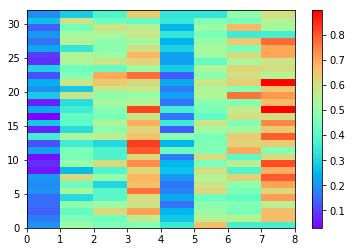

In [21]:
print("Problem H: Figure 6")
fig6 = plt.figure(6)
plt.pcolor(PUF_response_avg_skip16, cmap=cm.rainbow)
plt.colorbar(orientation='vertical')
plt.show()

In [22]:
hd_inter_skip16 = []
used_key_skip16 = []

for key1,value1 in PUF_response_hex_skip16.items():
    used_key_skip16.append(key1)
    for key2,value2 in PUF_response_hex_skip16.items():
        if key2 not in used_key_skip16:
            hd_inter_skip16.append(hd(value1,value2))

#len(hd_inter_skip16)

Problem I: Figure 7 inter-HD histogram


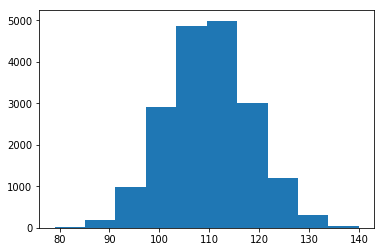

Problem I: Mean of the Hamming Distance is:  109.93231865284974
           Standard deviation of the Hamming Distance is:  8.28566611270787


In [23]:
hd_inter_skip16 = np.asarray(hd_inter_skip16)
print("Problem I: Figure 7 inter-HD histogram")
fig7 = plt.figure(7)
plt.hist(hd_inter_skip16)
plt.show()

hd_inter_skip16_mean = np.mean(hd_inter_skip16) 
hd_inter_skip16_std = np.std(hd_inter_skip16)
print("Problem I: Mean of the Hamming Distance is: ", hd_inter_skip16_mean)
print("           Standard deviation of the Hamming Distance is: ", hd_inter_skip16_std)